In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/iso.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,NaN,Lane #2,Lane #2,Lane #2,Lane #2,Lane #2,Lane #2,Lane #3,Lane #3,Lane #3,...,Lane #8,Lane #8,Lane #8,Lane #8,Lane #9,Lane #9,Lane #9,Lane #9,Lane #9,Lane #9
1,NaN,HENDERSON,HENDERSON,HENDERSON,HENDERSON,HENDERSON,HENDERSON,SEVILLA,SEVILLA,SEVILLA,...,AKINOSUN,AKINOSUN,AKINOSUN,AKINOSUN,SEDNEY,SEDNEY,SEDNEY,SEDNEY,SEDNEY,SEDNEY
2,Time,X,Y,Speed,Accel,Distance,PathDist,X,Y,Speed,...,Speed,Accel,Distance,PathDist,X,Y,Speed,Accel,Distance,PathDist
3,00:00.000,-100.131,9.07,0.000,0.000,0.000,0.000,-100.131,7.85,0.000,...,0.000,0.000,0.000,0.000,-100.131,0.53,0.000,0.000,0.000,0.000
4,00:00.000,-100.131,9.07,1.000,6.138,0.000,0.000,-100.131,7.85,0.955,...,1.000,6.000,0.000,0.000,-100.131,0.53,0.380,1.900,0.000,0.000


In [4]:
totalLanes = int((len(df.columns) - 1) / 6)
speedColumns = [i for i in range(3, len(df.columns), 6)]
pathColumns = [i for i in range(6, len(df.columns), 6)]
combinedColumns = speedColumns + pathColumns
combinedColumns.sort()
speed_df = df[combinedColumns]
speed_df.columns = speed_df.iloc[0] + ' - ' + speed_df.iloc[1] + ' - ' + speed_df.iloc[2]
speed_df = speed_df[3:].astype(float).round(2)

In [16]:
"""
lanes: list
"""
def make_plot(lanes='all'):
    
    if lanes == 'all':
        subset_df = speed_df.copy()
    else:
        columns = []
        for number in lanes:
            columns = columns + list(speed_df.filter(regex=("#{}".format(number))).columns)
        subset_df = speed_df[columns]
        
    for i in range(1, len(subset_df.columns) + 1, 2):
        xCol = subset_df.columns[i]
        yCol = subset_df.columns[i - 1]
        if i == 1:   
            ax = subset_df.plot(x=xCol, y=yCol, figsize=(11,11))
        else:
            subset_df.plot(x=xCol,y=yCol, ax=ax)

    ax.set_title('Athlete Speed Over 100m', fontweight="bold")
    ax.set_ylabel('Speed (m/s)')
    ax.set_xlabel('Distance (m)')
    legend = ax.legend(
        [label.strip(' - Speed') for label in ax.get_legend_handles_labels()[1]],
        loc='lower right'
    )

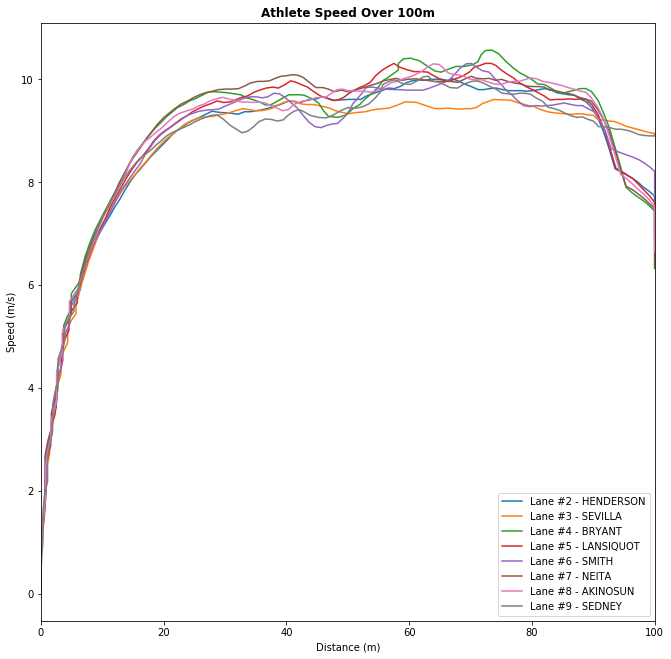

In [22]:
make_plot()

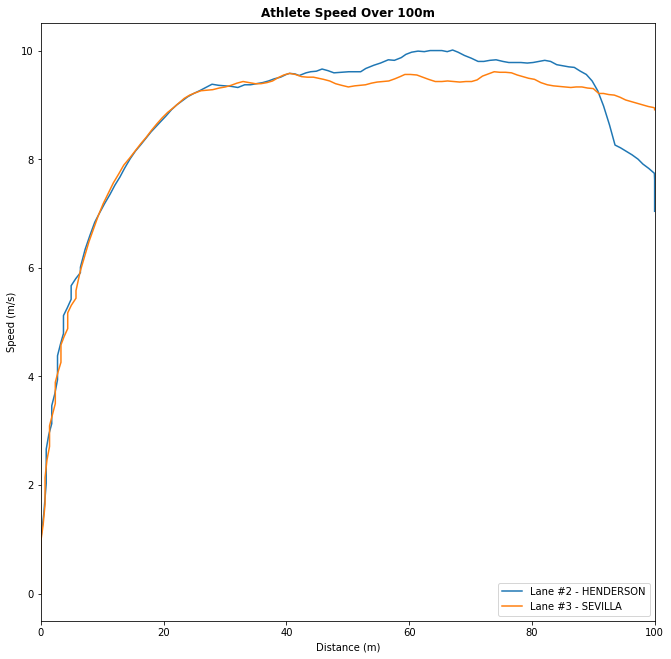

In [30]:
make_plot(lanes=[2,3])